<a href="https://colab.research.google.com/github/LoPA607/logistic-regression/blob/main/Logistuc_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd


In [47]:
data=np.loadtxt("ex2data2.txt", delimiter=',')
X=data[:,:2]
y=data[:,2]
X_train=X
y_train=y

In [48]:
print("X_train:",X_train[:5])
print("y_train:",y_train[:5])

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
y_train: [1. 1. 1. 1. 1.]


In [49]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
        # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

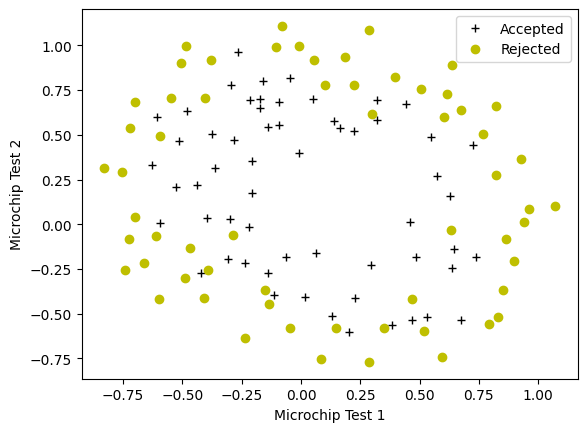

In [50]:
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")


plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()


#FEATURE MAPPING

In [51]:
def map_feature(X1, X2):
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree=6
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out, axis=1)

In [52]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [53]:
def sig(z):

    return 1/(1+np.exp(-z))

In [54]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [55]:
def compute_cost(X,y,w,b,lambda_=1):
  m,n=X.shape
  cost=0
  for i in range  (m):
    z=np.dot(X[i],w)+b
    f_wb=sigmoid(z)
    cost+=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
  total_cost=cost/m
  return total_cost

In [56]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):

    m, n = X.shape

    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b)

    # You need to calculate this value
    reg_cost = 0.

    ### START CODE HERE ###
    reg_cost = sum(np.square(w))
    ### END CODE HERE ###

    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [57]:


X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)




Regularized cost : 0.6618252552483948


In [58]:
def compute_gradient(X, y, w, b, lambda_=None):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m




    return dj_db, dj_dw



In [59]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
  m,n=X.shape
  dj_db,dj_dw=compute_gradient(X,y,w,b)
  for j in range(n):
    dj_dw[j]=dj_dw[j]+(lambda_/m)*w[j]
  return dj_db,dj_dw



In [60]:
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )


dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]


In [61]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
   m = len(X)
   J_history = []
   w_history = []
   for i in range(num_iters):
    dj_db,dj_dw=gradient_function(X,y,w_in,b_in,lambda_)
    w_in=w_in-alpha*dj_dw
    b_in=b_in-alpha*dj_db
    if i<1000:
      cost=cost_function(X,y,w_in,b_in,lambda_)
      J_history.append(cost)
    if i%math.ceil(num_iters/10)==0 or i==(num_iters-1):
      w_history.append(w_in)
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
   return w_in, b_in, J_history, w_history


In [68]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01;
iterations = 1000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration  100: Cost     0.67   
Iteration  200: Cost     0.64   
Iteration  300: Cost     0.63   
Iteration  400: Cost     0.62   
Iteration  500: Cost     0.61   
Iteration  600: Cost     0.60   
Iteration  700: Cost     0.60   
Iteration  800: Cost     0.59   
Iteration  900: Cost     0.59   
Iteration  999: Cost     0.59   


In [69]:
def plot_decision_boundary(w, b, X, y):

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))


        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)


        z = z.T


        plt.contour(u,v,z, levels = [0.5], colors="g")


<ipython-input-69-3b2bfb650718>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)


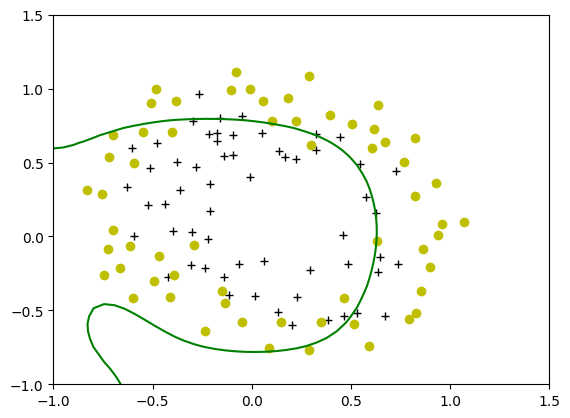

In [70]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [71]:
def predict(X,w,b):
  m,n=X.shape
  p=np.zeros(m)
  for i in range (m):
    z_wb=np.dot(X[i],w)
    for j in range(n):
      z_wb+=0
    z_wb+=b
    f_wb=sigmoid(z_wb)
    if f_wb>0.5:
      p[i]=1
    else:
      p[i]=0
  return p

In [72]:
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 66.101695
